In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

df = pd.read_csv(url, header=None, names=columns)
bins = [-1, 5, 15, df['Rings'].max() + 1]
labels = ['Child', 'Adolescent', 'Adult']
df['AgeGroup'] = pd.cut(df['Rings'], bins=bins, labels=labels)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,AgeGroup
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Adolescent
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Adolescent
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Adolescent
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Adolescent
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Adolescent


[]

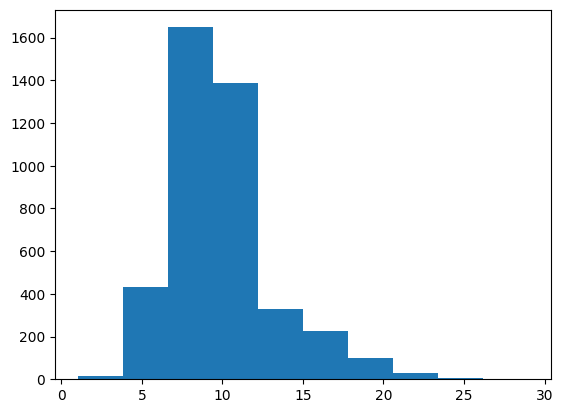

In [113]:
plt.hist(df['Rings'])
plt.plot()

In [114]:
df.shape


(4177, 10)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   object  
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   int64   
 9   AgeGroup        4177 non-null   category
dtypes: category(1), float64(7), int64(1), object(1)
memory usage: 298.0+ KB


In [116]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'Sex' is the column to be encoded
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,AgeGroup
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Adolescent
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Adolescent
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Adolescent
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Adolescent
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Adolescent


In [117]:
features= df.iloc[:, : -1]
predictions= df.iloc[:, -1]
# print(features.head())
# print(predictions
features.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [118]:
predictions.head()

0    Adolescent
1    Adolescent
2    Adolescent
3    Adolescent
4    Adolescent
Name: AgeGroup, dtype: category
Categories (3, object): ['Child' < 'Adolescent' < 'Adult']

In [119]:

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
feature_scaled= scaler.fit_transform(features)
feature_scaled= pd.DataFrame(feature_scaled, columns= features.columns)
feature_scaled.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


In [120]:
predictions.head()

0    Adolescent
1    Adolescent
2    Adolescent
3    Adolescent
4    Adolescent
Name: AgeGroup, dtype: category
Categories (3, object): ['Child' < 'Adolescent' < 'Adult']

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled, predictions, test_size=0.2, random_state=0, shuffle=True)

In [122]:
Train_data= pd.concat([X_train, y_train], axis= 'columns')
Train_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,AgeGroup
3141,-0.064355,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,-1.530402,Child
3521,-0.064355,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,-2.150791,Child
883,1.151980,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,1.571544,Adolescent
3627,1.151980,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,0.020571,Adolescent
2106,1.151980,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,1.261349,Adolescent


In [123]:
Train_data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,-0.001008,0.015784,0.015938,0.014641,0.019239,0.019071,0.017454,0.018351,0.007665
std,1.005163,0.997336,0.996640,1.019147,1.007053,1.010003,1.007648,1.004612,0.994357
min,-1.280690,-3.739154,-3.556267,-3.335953,-1.686092,-1.614731,-1.643173,-1.705134,-2.771180
25%,-1.280690,-0.616198,-0.583316,-0.586208,-0.783639,-0.772147,-0.794642,-0.767540,-0.599818
50%,-0.064355,0.174951,0.172519,0.131117,-0.038224,-0.080507,-0.073846,-0.027523,0.020571
75%,1.151980,0.799543,0.777187,0.609334,0.692916,0.676466,0.683445,0.655017,0.330765
max,1.151980,2.423480,2.440025,23.683287,3.978457,5.085388,5.286500,5.504642,5.293878


In [124]:
print(Train_data.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'AgeGroup'],
      dtype='object')


In [139]:
# import pandas as pd

# # Define a function to remove outliers based on IQR
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_no_outliers

# # Remove outliers for each numerical column
# numerical_columns = [ 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
# for column in numerical_columns:
#     Train_data = remove_outliers_iqr(Train_data, column)

# # Now, you can proceed with your previous code for feature selection and modeling.


In [140]:
Train_data.shape

(3341, 6)

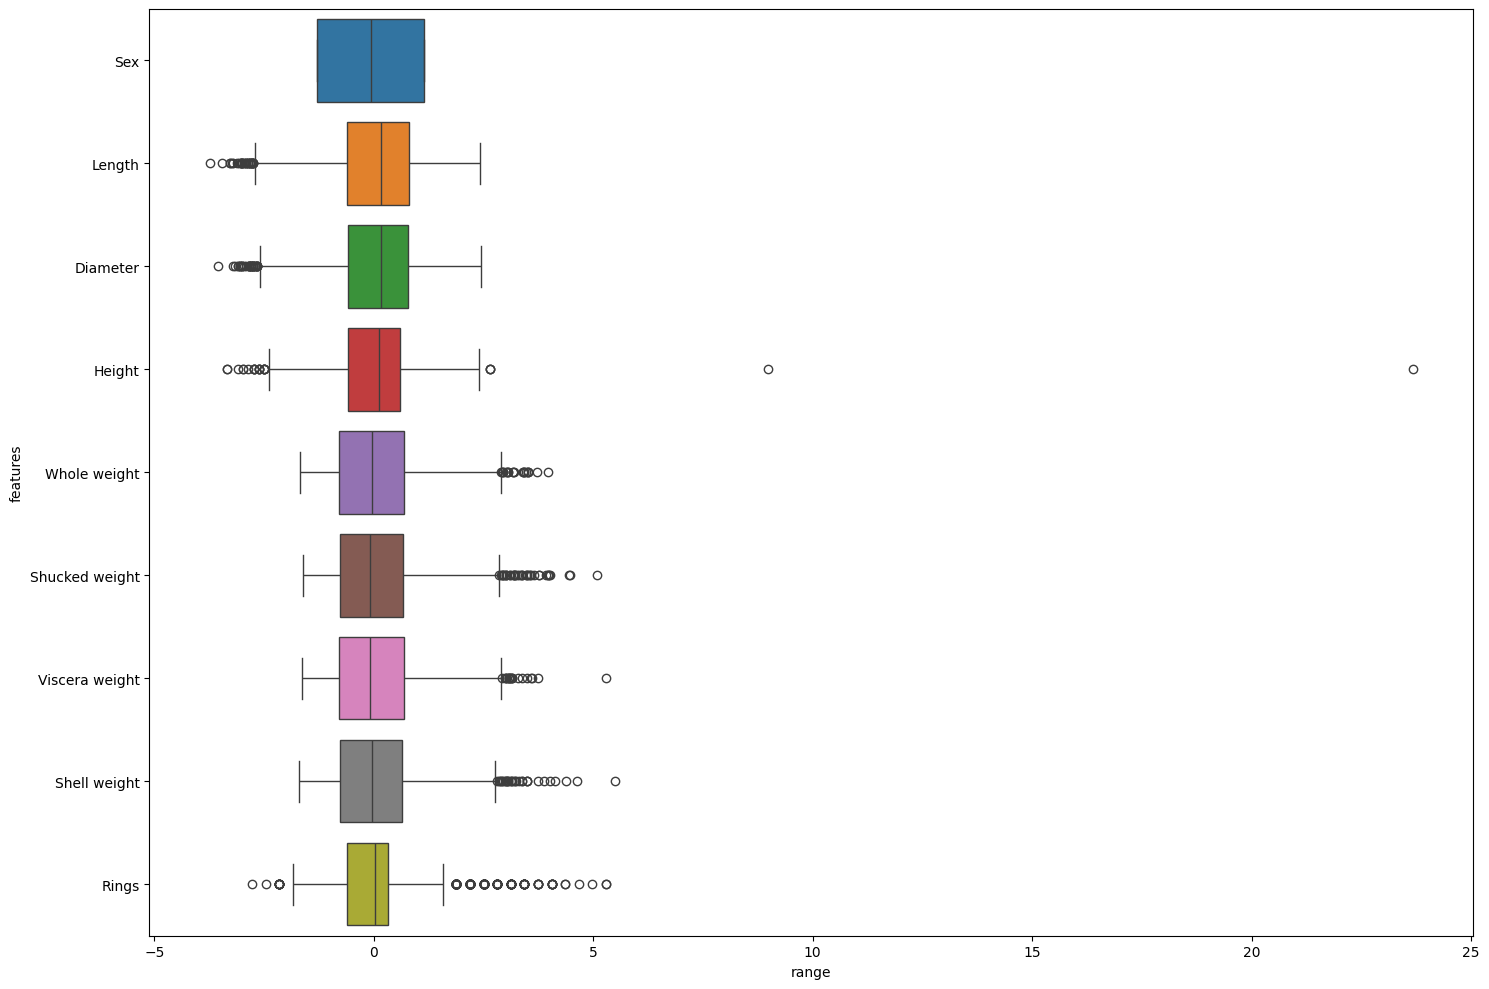

In [127]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X_train, orient="h").set(xlabel= 'range', ylabel='features')
plt.tight_layout()

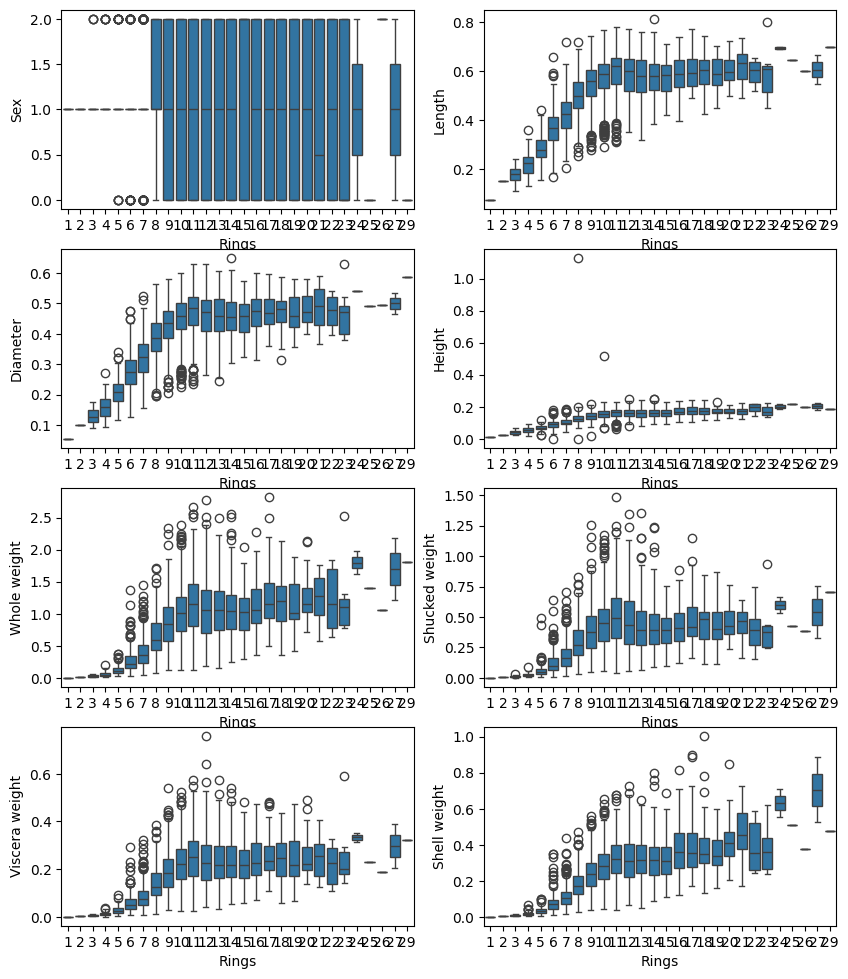

In [128]:

fig, axes = plt.subplots(5, 2, figsize=(10, 15)) 

for i, ax in enumerate(axes.flat):
    if i < 8:  # Make sure the index is within the range of your DataFrame's columns
        sns.boxplot(data=df, x='Rings', y=df.columns[i], ax=ax)  # 'Rings' as x variable
    else:
        ax.set_visible(False)

plt.show()


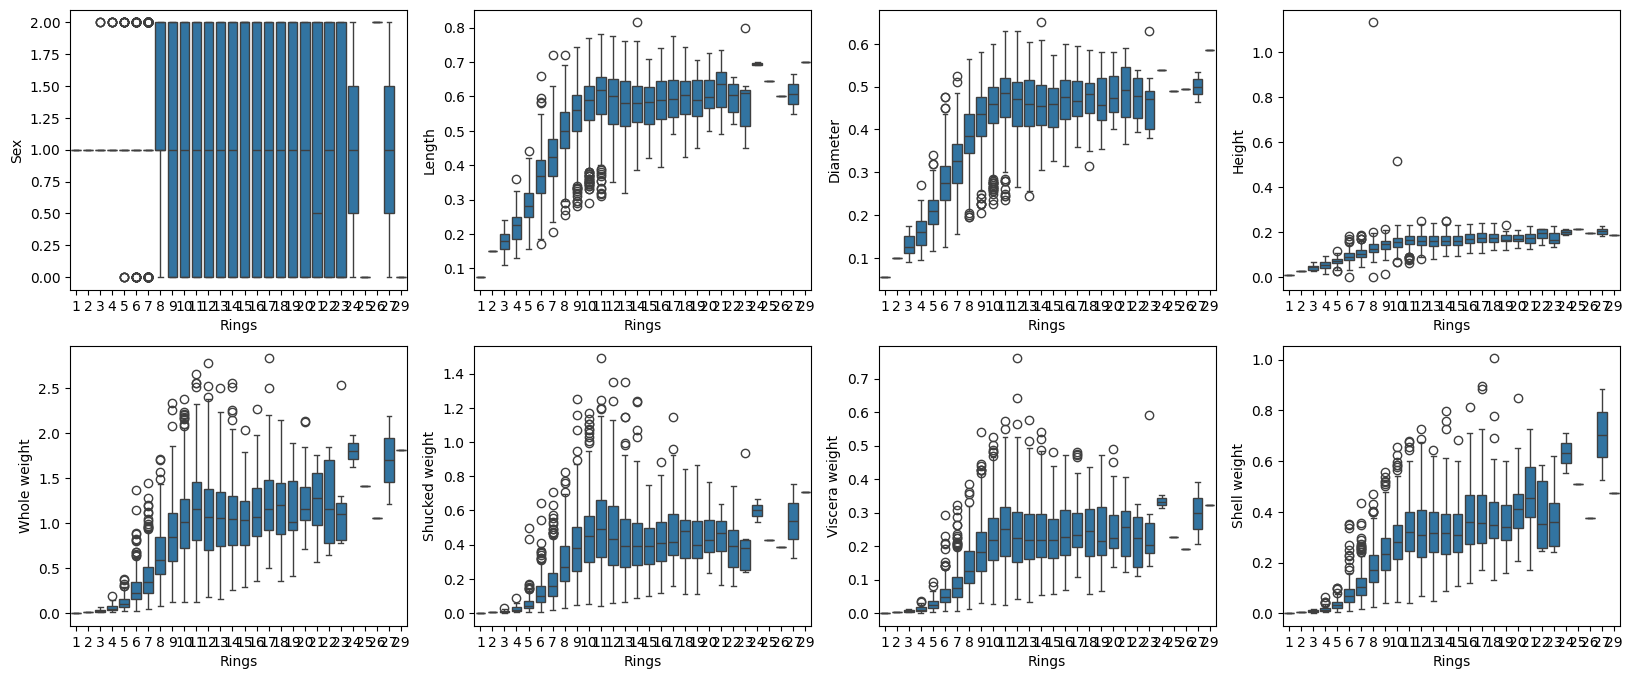

In [129]:
import seaborn as sns
# Assuming 'df' is your DataFrame
fig, axes = plt.subplots(2, 4, figsize=(20, 8))  # Adjust the number of columns as needed

for i, ax in enumerate(axes.flat):
    if i < 9:  # Make sure the index is within the range of your DataFrame's columns
        sns.boxplot(data=df, x='Rings', y=df.columns[i], ax=ax)
    else:
        ax.set_visible(False)

plt.show()


In [130]:

numeric_columns = Train_data.select_dtypes(include=[np.number])
corr_mat = numeric_columns.corr(method='pearson')

corr_mat

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.034078,-0.038747,-0.040184,-0.021491,-0.003461,-0.033895,-0.032614,-0.027889
Length,-0.034078,1.000000,0.986626,0.809545,0.925283,0.898074,0.901923,0.896668,0.551926
Diameter,-0.038747,0.986626,1.000000,0.815144,0.924761,0.892732,0.898102,0.903953,0.569614
Height,-0.040184,0.809545,0.815144,1.000000,0.802585,0.761996,0.780910,0.799362,0.533590
Whole weight,-0.021491,0.925283,0.924761,0.802585,1.000000,0.969501,0.965920,0.953238,0.535350
Shucked weight,-0.003461,0.898074,0.892732,0.761996,0.969501,1.000000,0.932480,0.879739,0.414353
Viscera weight,-0.033895,0.901923,0.898102,0.780910,0.965920,0.932480,1.000000,0.904726,0.496502
Shell weight,-0.032614,0.896668,0.903953,0.799362,0.953238,0.879739,0.904726,1.000000,0.625154
Rings,-0.027889,0.551926,0.569614,0.533590,0.535350,0.414353,0.496502,0.625154,1.000000


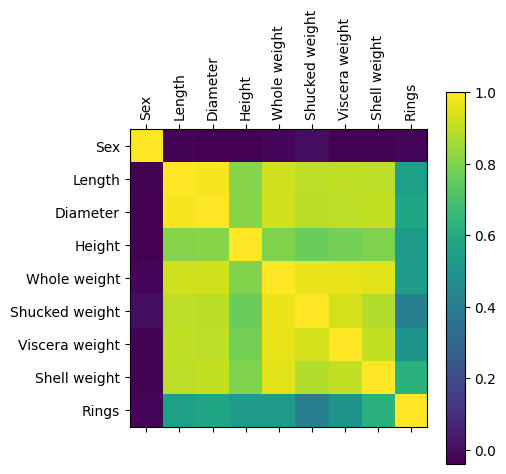

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'AgeGroup'],
      dtype='object')


In [131]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()
print(Train_data.columns)


In [132]:

Train_data.drop(['Sex','Diameter','Shucked weight', 'Viscera weight'], axis=1, inplace=True)
X_train.drop(['Sex','Diameter','Shucked weight', 'Viscera weight'], axis=1, inplace=True)
X_test.drop(['Sex','Diameter','Shucked weight', 'Viscera weight'], axis=1, inplace=True)


In [133]:
corr_mat = Train_data.corr(method ='pearson', numeric_only=True) #Pearson correlation is used
corr_mat

,Length,Height,Whole weight,Shell weight,Rings
Length,1.000000,0.809545,0.925283,0.896668,0.551926
Height,0.809545,1.000000,0.802585,0.799362,0.533590
Whole weight,0.925283,0.802585,1.000000,0.953238,0.535350
Shell weight,0.896668,0.799362,0.953238,1.000000,0.625154
Rings,0.551926,0.533590,0.535350,0.625154,1.000000


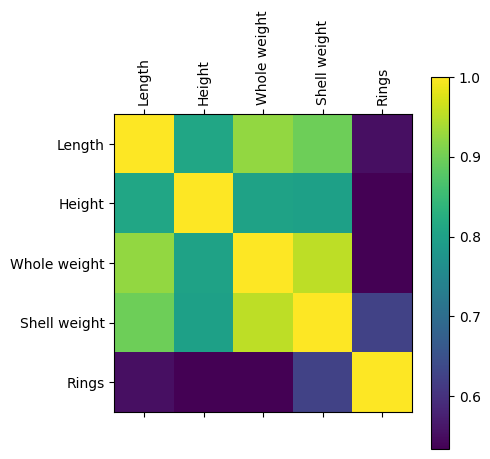

Index(['Length', 'Height', 'Whole weight', 'Shell weight', 'Rings',
       'AgeGroup'],
      dtype='object')


In [134]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()
print(Train_data.columns)


In [135]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 
model.fit(X_train, y_train) 
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [136]:
from sklearn.metrics import f1_score, confusion_matrix

F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.937
Train confusion matrix: 
 [[2775   86  130]
 [  13  197    0]
 [   6    0  134]]
Test F1 score:  0.931
Test confusion matrix: 
 [[680  21  35]
 [  4  47   0]
 [  3   0  46]]


In [141]:
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score

# # Select the features based on correlation
# selected_features = ['Length', 'Shell weight']

# # Extract the selected features and target variable
# X = Train_data[selected_features]
# y = Train_data['Rings']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Gaussian Naive Bayes model
# model1 = GaussianNB()

# # Fit the model on the training data
# model1.fit(X_train, y_train)

# # Predict on the test data
# y_pred = model1.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
